In [1]:
#importing Libraries
import pandas as pd
import numpy as np

#importing Visualation Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#importing Warnings
import warnings
warnings.filterwarnings('ignore')

In [38]:
#loading dataset
ds2=pd.read_csv('heart.csv' ,na_values="?")
ds2=pd.DataFrame(ds2)

#making copy of dataset
ds=ds2.copy()

In [3]:

ds

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [39]:
# getting the info of the data

ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [5]:
#basic statistical details like percentile, mean, standard deviation etc.
ds.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


Observations:

Average age = 58

Max Age = 77



In [6]:
#Changing Dataset
ds['num'] = ds.num.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
ds['sex'] = ds.sex.map({0: 'female', 1: 'male'})


as we know that the integer valued from 0 (no presence) to 4, so we replaced 1,2,3,4 as 1 

# Missing Value

In [40]:
#Checking null values
ds.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [41]:
#Replacing NaN value in both datasets

#dataset 1
ds['thal'] = ds.thal.fillna(ds.thal.mean())
ds['ca'] = ds.ca.fillna(ds.ca.mean())

#dataset 2
ds2['thal'] = ds2.thal.fillna(ds2.thal.mean())
ds2['ca'] = ds2.ca.fillna(ds2.ca.mean())

# visualation

0    164
1    139
Name: num, dtype: int64


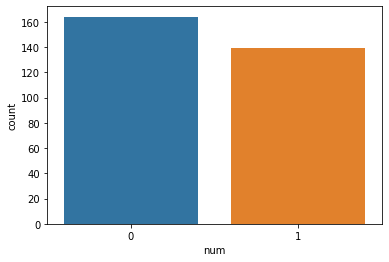

In [7]:
#Get a count of the number of patients with (1) and without (0) a cardiovasculer disease
print(ds['num'].value_counts())

#Visualize this count
sns.countplot(ds['num'])

we observe people with no heart diease 
and we also see that balanced so our preferd matix will be accuracy score.

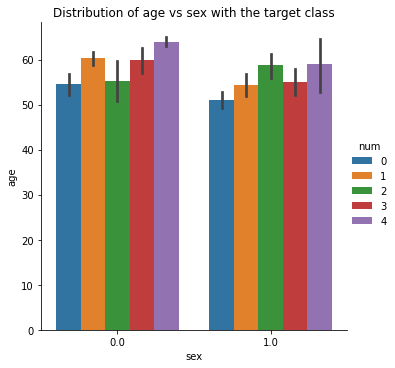

In [42]:
#plotting age vs sex
sns.catplot(kind = 'bar', data = ds, y = 'age', x = 'sex', hue = 'num')
plt.title('Distribution of age vs sex with the target class')
plt.show()

We see that for females who are suffering from the disease are older than males

Text(0.5, 1.0, 'Variation of Age for each target class')

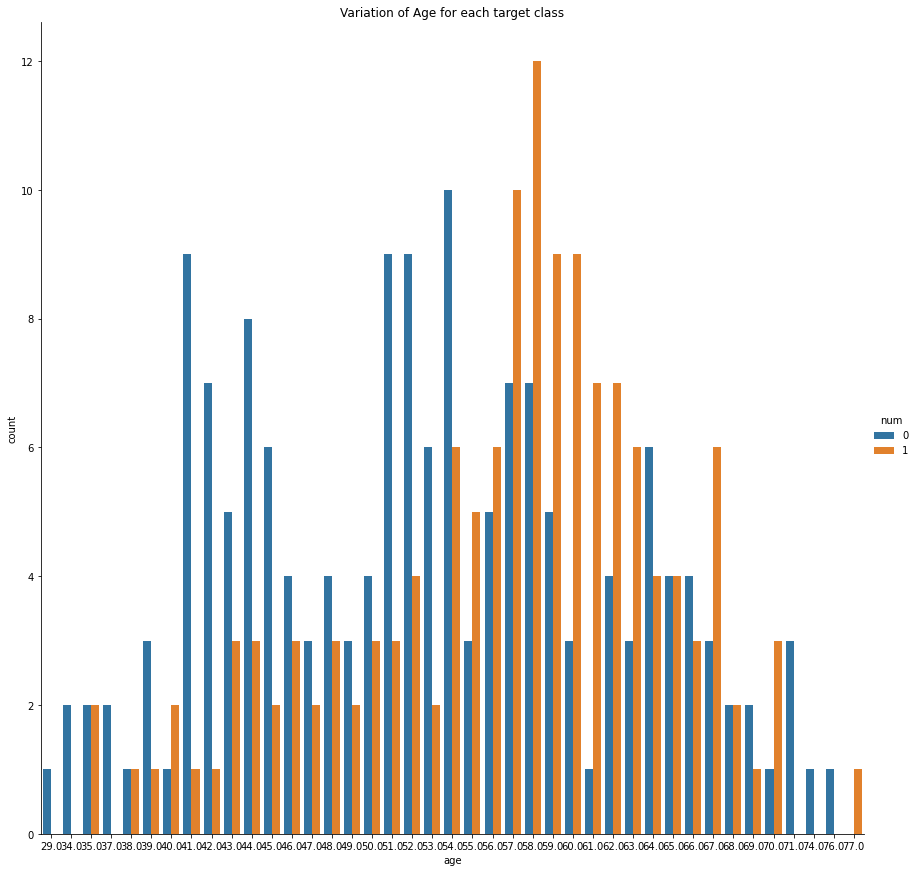

In [9]:
# distribution of target vs age  
sns.catplot(kind = 'count', data = ds, x = 'age', hue = 'num',size=12, order = ds['age'].sort_values().unique())
plt.title('Variation of Age for each target class')

We see that most people who are suffering are of the age of 58, followed by 57.

Majorly, people belonging to the age group 50+ are suffering from the disease.

Text(0.5, 1.0, 'Relation of Cholestrol with Target')

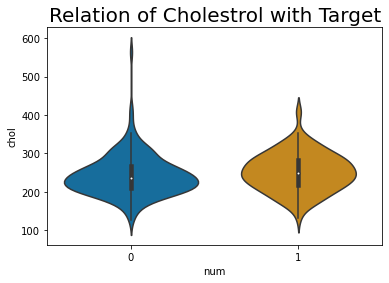

In [10]:
# cholestrol vs target

sns.violinplot(ds['num'], ds['chol'], palette = 'colorblind')
plt.title('Relation of Cholestrol with Target', fontsize = 20)

People with high cgolestrol has high chance of heart disease

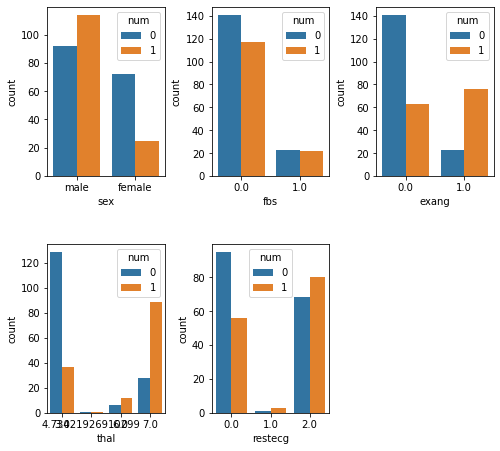

In [11]:
#Plotting Binary data with age
fig = plt.figure(figsize=(8, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4, bottom=0.01, top=0.95)
bins = ['sex', 'fbs', 'exang', 'thal', 'restecg']
for i, var in enumerate(bins):
    i = i + 1
    ax = fig.add_subplot(2, 3, i)
    sns.countplot(data = ds, x = var, hue = 'num', ax = ax)


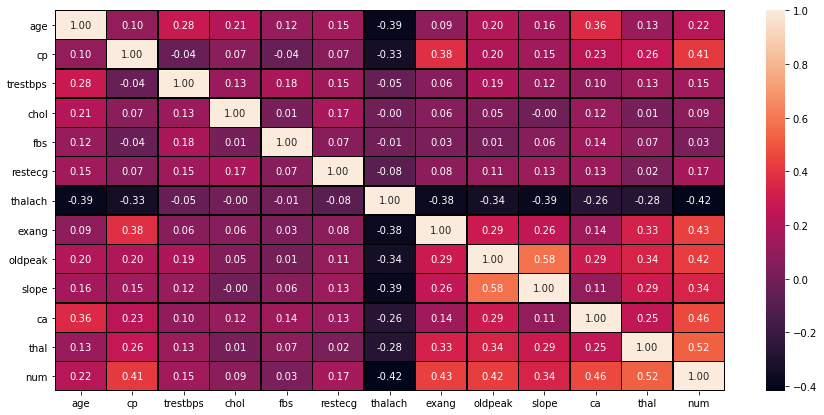

In [12]:
#Correlation Heatmap
plt.figure(figsize=(15,7))
sns.heatmap(ds.corr(), annot=True, linewidths=0.5,linecolor="black", fmt= '.2f')

Heart Disease has high correlation with
1. Chest Pain
2. Exercise induced angina
3. oldpeak
4. slope
5. ca
6. thal

and low correlation with

1. Blood Pressure
2. Chlostrol
3. fbs
4. restecg
5. thaecg

# Skewness

In [26]:
#Checking Skewness
ds.skew()

age        -0.209060
cp         -0.841754
trestbps    0.706035
chol        1.135503
fbs         1.986652
restecg     0.019900
thalach    -0.537449
exang       0.742532
oldpeak     1.269720
slope       0.508316
ca          1.197201
thal        0.245250
num         0.166406
dtype: float64

In [27]:
#removing Skewness
l2=['oldpeak','fbs' ,'ca','chol']
for i in l2:
    ds[i]=np.sqrt(ds[i])

# Making Model

In [29]:
from sklearn.preprocessing import StandardScaler

#Making X and Y variables
x=ds2.iloc[:,:-1]
y=ds2['num']

#Standard Scaling
sc=StandardScaler()
x=sc.fit_transform(x)

In [30]:
x.shape

(303, 13)

In [31]:
#ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#model selection
from sklearn.model_selection import train_test_split, GridSearchCV

#metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
#testing Different Models
model=[LogisticRegression(),SVC(), DecisionTreeClassifier(), KNeighborsClassifier()]

x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=42, test_size=0.20)

for i in model:
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print(i)
    print(i.score(x_train,y_train))
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print()
    print('..................................................................................................................')

LogisticRegression()
0.6694214876033058
0.5409836065573771
[[26  1  2  0  0]
 [ 3  3  3  3  0]
 [ 2  1  2  4  0]
 [ 1  2  2  2  0]
 [ 0  1  0  3  0]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        29
           1       0.38      0.25      0.30        12
           2       0.22      0.22      0.22         9
           3       0.17      0.29      0.21         7
           4       0.00      0.00      0.00         4

    accuracy                           0.54        61
   macro avg       0.32      0.33      0.32        61
weighted avg       0.51      0.54      0.52        61


..................................................................................................................
SVC()
0.7851239669421488
0.5245901639344263
[[28  0  1  0  0]
 [ 5  3  3  1  0]
 [ 3  1  1  4  0]
 [ 3  2  2  0  0]
 [ 1  1  0  2  0]]
              precision    recall  f1-score   support

           0       0.70      0.97      0.81        29
 

In [21]:
# Parameter tunning using grid search CV
params = {'C' : [0.01,0.1,0.25,0.5,0.75,1,10,100],
         'gamma' : [1,0.75,0.5,0.25,0.1,0.01,0.001],
         'kernel': ['rbf','poly','linear']}
gridsearch = GridSearchCV(SVC(),params,refit=True)
gridsearch.fit(x_train,y_train)

gridsearch.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [22]:
#Finding best random score
max_ac_score=0
svc=SVC(kernel='linear', gamma=1, C=0.01)
for r_state in range(35,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=r_state, test_size=0.20)
    svc.fit(x_train,y_train)
    predsvc=svc.predict(x_test)
    acc_score=accuracy_score(y_test,predsvc)
    if acc_score>max_ac_score:
        max_ac_score=acc_score
        final_rs=r_state
print('max accuracy score corrosponding to' ,final_rs ,'is', max_ac_score)

max accuracy score corrosponding to 41 is 0.6885245901639344


In [23]:
#Calling Model
svc=SVC(kernel='linear', gamma=1, C=0.01)

#Train Test Split
x_train,x_test,y_train,y_test=train_test_split(x,y, random_state=41, test_size=0.20)

#fitting Train data in model
svc.fit(x_train,y_train)

#Predecting Values
predsvc=svc.predict(x_test)

#printing Matrics
print(svc.score(x_train,y_train))
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.5826446280991735
0.6885245901639344
[[40  0  0  0  0]
 [ 6  1  4  0  0]
 [ 1  1  1  0  0]
 [ 3  0  3  0  0]
 [ 0  0  1  0  0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        40
           1       0.50      0.09      0.15        11
           2       0.11      0.33      0.17         3
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         1

    accuracy                           0.69        61
   macro avg       0.28      0.28      0.24        61
weighted avg       0.62      0.69      0.62        61



In [24]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

rd=RandomForestClassifier(n_estimators=20)
#fitting Train data in model
rd.fit(x_train,y_train)

#Predecting Values
pred=rd.predict(x_test)

#printing Matrics
print(rd.score(x_train,y_train))
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

1.0
0.7213114754098361
[[38  2  0  0  0]
 [ 4  3  2  2  0]
 [ 3  0  0  0  0]
 [ 2  1  0  2  1]
 [ 0  0  0  0  1]]
              precision    recall  f1-score   support

           0       0.81      0.95      0.87        40
           1       0.50      0.27      0.35        11
           2       0.00      0.00      0.00         3
           3       0.50      0.33      0.40         6
           4       0.50      1.00      0.67         1

    accuracy                           0.72        61
   macro avg       0.46      0.51      0.46        61
weighted avg       0.68      0.72      0.69        61



In [37]:
# Saving best Model
import joblib
joblib.dump(svc,"Heart.pkl")

['Heart.pkl']